In [1]:
from myAE import Manager
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

/home/secondvoca/anaconda3/envs/torch/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
manager = Manager()
manager.prepare_data()

In [4]:
# select 6,000 random sample

from torch.utils.data import Dataset, DataLoader

class TmpDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

new_indices = torch.randint(len(manager.training_data), (6000,))
new_data = manager.training_data[new_indices]
manager.training_data = new_data
manager.training_targets = torch.ones(6000)

manager.training_data_length = len(new_data)

manager.train_dataloader = DataLoader(
    TmpDataset(manager.training_data, manager.training_targets), batch_size=128, shuffle=True
)

manager.set_default_model(4, 2)

In [5]:
def calc_loss(model, x, y, F, device):
    h = model.get_submodule("encoder")(x)
    mu = h[:, :2]
    log_sigma = h[:, 2:4]
    sigma = log_sigma.exp()
    z = torch.rand_like(mu, device=device) * sigma + mu
    pred = model.get_submodule("decoder")(z)
    kl = 0.5*(mu.square() + sigma.square() - log_sigma - 1).sum(dim=1).mean()
    ll = F.binary_cross_entropy(pred, x, reduction='sum')/len(x)
    loss = ll + kl
    return loss

hist = manager.train_on_cpu(calc_loss, epochs=60)

Now, it is working on cpu.


100%|██████████| 60/60 [00:36<00:00,  1.66it/s]


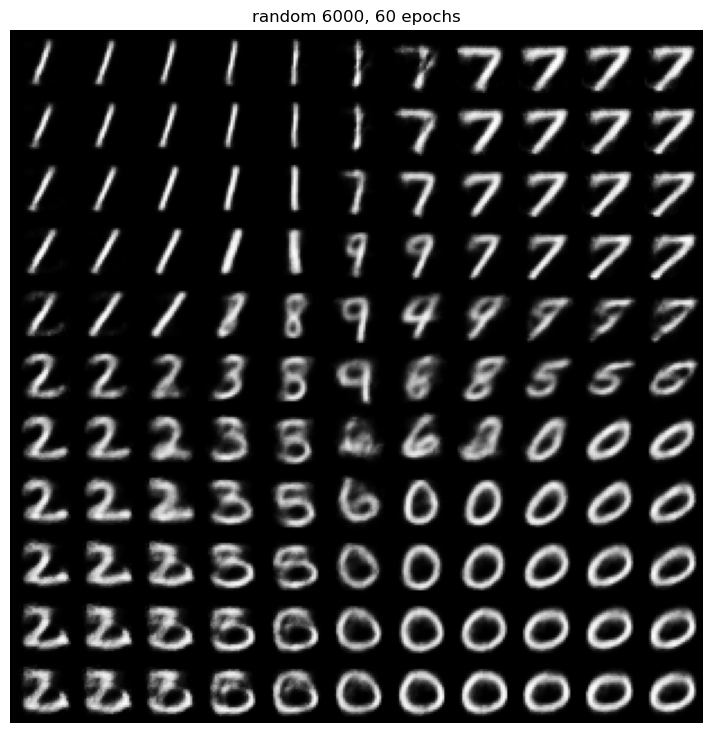

In [6]:
manager.plot_generated_images('random 6000, 60 epochs')

In [7]:
manager = Manager()
manager.prepare_data()

In [8]:
# select 6,000 random sample

from torch.utils.data import Dataset, DataLoader

class TmpDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

new_indices = torch.randint(len(manager.training_data), (6000,))
new_data = manager.training_data[new_indices]
manager.training_data = new_data
manager.training_targets = torch.ones(6000)

manager.training_data_length = len(new_data)

manager.train_dataloader = DataLoader(
    TmpDataset(manager.training_data, manager.training_targets), batch_size=128, shuffle=True
)

manager.set_default_model(4, 2)

In [9]:
def calc_loss(model, x, y, F, device):
    h = model.get_submodule("encoder")(x)
    mu = h[:, :2]
    log_sigma = h[:, 2:4]
    sigma = log_sigma.exp()
    z = torch.rand_like(mu, device=device) * sigma + mu
    pred = model.get_submodule("decoder")(z)
    kl = 0.5*(mu.square() + sigma.square() - log_sigma - 1).sum(dim=1).mean()
    ll = F.binary_cross_entropy(pred, x, reduction='sum')/len(x)
    loss = ll + kl
    return loss

hist = manager.train_on_cpu(calc_loss, epochs=60)

Now, it is working on cpu.


100%|██████████| 60/60 [00:34<00:00,  1.72it/s]


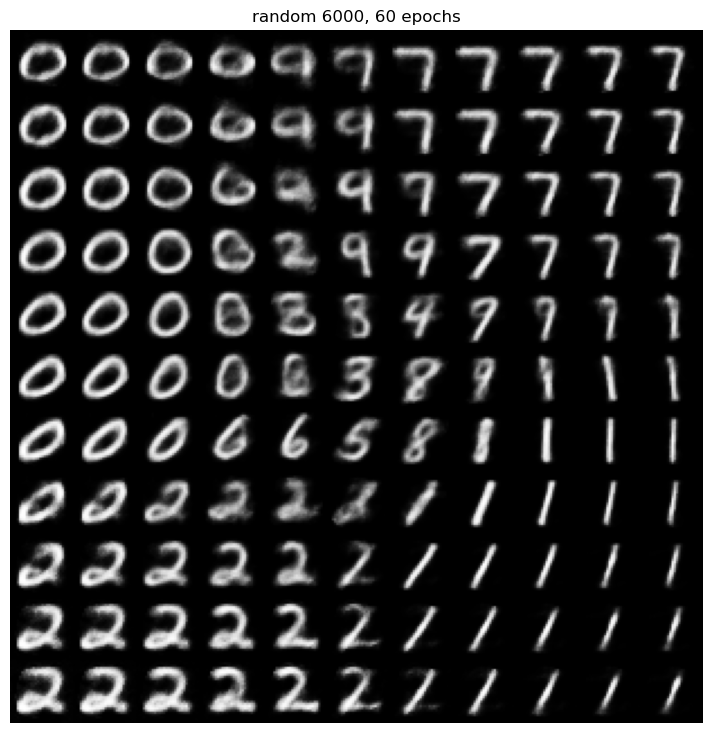

In [10]:
manager.plot_generated_images('random 6000, 60 epochs')